<a href="https://colab.research.google.com/github/kwdaisuke/LeWagon/blob/main/Copy_of_MathNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Math for Data Science

In [46]:
!pip install d2l
!pip install -U pandas_profiling

     |████████████████████████████████| 83 kB 1.4 MB/s 


In [ ]:
import os
os.kill(os.getpid(), 9)

## Part 1 Theoretical explanation

### Differential calculus
The best constant approximation for the rate of change

![](https://upload.wikimedia.org/wikipedia/commons/3/37/Graph_of_sliding_derivative_line_no_text.gif)



<div>
<img src="https://ds055uzetaobb.cloudfront.net/image_optimizer/f1aad8cb82a3d4acf67f2fc6523d8fe10677b478.gif" width="400"/>
</div>


<div>
<img src="https://mathinsight.org/media/image/image/partial_derivative_as_slope.png" width="400"/>
</div>

$L = lim_{h→0}\frac{f(a+h) - f(a)}{h}$

- Power rules \
$\frac{d}{dx}x^a=ax^{a-1}$ 

- Exponential and logarthm \
$\frac{d}{dx}e^x=e^x$ \
$\frac{d}{dx}a^x=a^xln(a)$

- Sum rule \
$(af+ \beta g)` = af` + \beta g`$

- Product rule \
$(fg)` = f`g +fg`$

- Quotient rule \
$(\frac{f}{g})` = \frac{f`g-fg`}{g^2}$

In [5]:
from sympy import *

# Declare 'x' to SymPy
x, y = symbols('x, y')

# Now just use Python syntax to declare function
f = x**2

# Calculate the derivative of the function
dx_f = diff(f)
dx_f # prints 2*x

2*x

In [11]:
f = x**3 + 5*x + 2; f

x**3 + 5*x + 2

In [22]:
Answer = "8" #@param ["3*x**2 + 5", "8", "3*x**2 + 5 + 2"]
if Answer == "3x**2 + 5":
  f = x**3 + 5*x + 2
  print("Correct!")
else:
  print("Try again :(")

Try again :(


In [9]:
f = exp(x); f

exp(x)

In [25]:
Answer = "2e" #@param ["e", "e**x", "2e", "x"]
if Answer == "e**x":
  print("Correct!")
  print(diff(f))
else:
  print("Try again :(")

Try again :(


In [10]:
f = 2*x**3 + 3*y**3; f

2*x**3 + 3*y**3

In [26]:
Answer = "9*y**2" #@param ["6*x**2", "9*y**2", "6*x**3+9*y**2", "3*x**2"]
if Answer == "6*x**2":
  print("Correct!")
  print(diff(f))
else:
  print("Try again :(")

Try again :(


### Integral Calculus

 an integral assigns numbers to functions in a way that describes displacement, area, volume, and other concepts that arise by combining infinitesimal data

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/5/54/Integral_riemann_animada.gif" width="400"/>
</div>

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Riemann_Integration_and_Darboux_Upper_Sums.gif/600px-Riemann_Integration_and_Darboux_Upper_Sums.gif" width="400"/>
</div>


#### Application: EM Algorithm

${\displaystyle L({\boldsymbol {\theta }};\mathbf {X} )=p(\mathbf {X} \mid {\boldsymbol {\theta }})=\int p(\mathbf {X} ,\mathbf {Z} \mid {\boldsymbol {\theta }})\,d\mathbf {Z} =\int p(\mathbf {Z} \mid \mathbf {X} ,{\boldsymbol {\theta }})p(\mathbf {X} \mid {\boldsymbol {\theta }})\,d\mathbf {Z} }$ \\
${\displaystyle Q({\boldsymbol {\theta }}\mid {\boldsymbol {\theta }}^{(t)})=\operatorname {E} _{\mathbf {Z} \mid \mathbf {X} ,{\boldsymbol {\theta }}^{(t)}}\left[\log L({\boldsymbol {\theta }};\mathbf {X} ,\mathbf {Z} )\right]\,}$

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif" width="400"/>
</div>

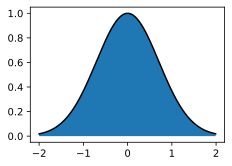

In [12]:
%matplotlib inline
import torch
from IPython import display
from mpl_toolkits import mplot3d
from d2l import torch as d2l

x = torch.arange(-2, 2, 0.01)
f = torch.exp(-x**2)

d2l.set_figsize()
d2l.plt.plot(x, f, color='black')
d2l.plt.fill_between(x.tolist(), f.tolist())
d2l.plt.show()

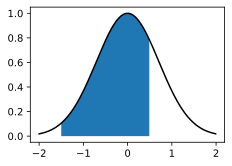

In [23]:
x = torch.arange(-2, 2, 0.01)
f = torch.exp(-x**2)

d2l.set_figsize()
d2l.plt.plot(x, f, color='black')
d2l.plt.fill_between(x.tolist()[50:250], f.tolist()[50:250])
d2l.plt.show()

In [31]:
from scipy import stats

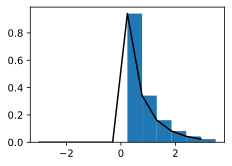

'approximation: 0.8592929510983329, truth: tensor([0.8047])'

In [111]:
distribution = "gamma" #@param ["normal", "binomial", "gamma", "uniform", "laplace", "double weibull"] {allow-input: true}
epsilon = 0.53956 #@param {type:"slider", min:0, max:1, step:0.00001}

min = -3 #@param {type:"number"}
max = 3 #@param {type:"number"}

x = torch.arange(min, max, epsilon)

#f = x / (1 + x**2)
if distribution == "normal":
  f=torch.tensor(stats.norm(0, 1).pdf(x))
elif distribution == "binomial":
  f = torch.tensor(stats.binom.pmf(x, n=5, p=0.1))
elif distribution == "gamma":
  f = torch.tensor(stats.gamma.pdf(x, 0.6))
elif distribution == "uniform":
  f = torch.tensor(stats.uniform.pdf(x))
elif distribution == "laplace":
  f = torch.tensor(stats.laplace.pdf(x))
elif distribution == "double weibull":
  f = torch.tensor(stats.dweibull.pdf(x, 2.07))
approx = torch.sum(epsilon * f)
true = torch.log(torch.tensor([5.])) / 2

d2l.set_figsize()
d2l.plt.bar(x, f, width=epsilon, align='edge')
d2l.plt.plot(x, f, color='black')
d2l.plt.show()

f'approximation: {approx}, truth: {true}'

### Linear Algebra

Linear algebra is the branch of mathematics concerning linear equations such as:

${\displaystyle a_{1}x_{1}+\cdots +a_{n}x_{n}=b,}{\displaystyle a_{1}x_{1}+\cdots +a_{n}x_{n}=b,}$
linear maps such as:

${\displaystyle (x_{1},\ldots ,x_{n})\mapsto a_{1}x_{1}+\cdots +a_{n}x_{n},}$
and their representations in vector spaces and through matrices.

![](https://thumbs.gfycat.com/CooperativeQuerulousFirefly.webp)

![](https://thumbs.gfycat.com/VeneratedSpitefulFrilledlizard.webp)

In [35]:
import numpy as np
from numpy import random
x = np.arange(1, 4)
y = np.arange(6, 9)
A = np.arange(1, 10).reshape(3, 3)
B = random.randint(1, 10, (3, 3))

print("x: ", x)
print("y: ", y)
print("A: ", A)
print("B: ", B)

x:  [1 2 3]
y:  [6 7 8]
A:  [[1 2 3]
 [4 5 6]
 [7 8 9]]
B:  [[3 1 4]
 [1 5 8]
 [1 6 9]]


In [17]:
# below two are the same
print(np.transpose(A))
print(A.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]
[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [40]:
print("Inner product of x and y")
print(np.dot(x, y))
print(np.matmul(x, y))
print(x@y)

print("Matrix Multiplication of A and B")
print(np.dot(A, B))
print(np.matmul(A, B))
print(A@B)

xとyの内積
44
44
44
AとBの行列積
[[ 30  33  28]
 [ 69  81  64]
 [108 129 100]]
[[ 30  33  28]
 [ 69  81  64]
 [108 129 100]]
[[ 30  33  28]
 [ 69  81  64]
 [108 129 100]]


In [45]:
# Matrix multiplication is not commutative
print(np.matmul(A, B))
print(np.matmul(B, A))

[[  8  29  47]
 [ 23  65 110]
 [ 38 101 173]]
[[ 35  43  51]
 [ 77  91 105]
 [ 88 104 120]]


In [42]:
# Broadcasting
print(np.matmul(A, x)) # x is treated as the vertical vector
print(np.matmul(x, A)) # x is treated as the horizontal vector

[14 32 50]
[30 36 42]


In [56]:
a = np.array([1, 0, 1, 0, 1])# 1 dimensional vector with 5 components

# Transposing doesn't affec the outcome
print("Before Transposing: ", a)
print("After Transposing: ", a.T)

# Two dimensional vecotrs are interpretable to distinguish

# Make 2 dimensional horizontal vector 
a = a.reshape(1, -1) # axis = -1 infers the number of components automatically
print("Before Transposing: ", a)
print("After Transposing:\n ", a.T)

Before Transposing:  [1 0 1 0 1]
After Transposing:  [1 0 1 0 1]
Before Transposing:  [[1 0 1 0 1]]
After Transposing:
  [[1]
 [0]
 [1]
 [0]
 [1]]


In [28]:
from numpy import linalg as LA

In [40]:
# Determinant
print(LA.det(A))
print(LA.det(B))

# Inverse Matrix
print(LA.inv(B)) # A is singular matrix, thus non-invertible

0.0
-6.000000000000009
[[ 0.5        -2.5         2.        ]
 [ 0.16666667 -3.83333333  3.33333333]
 [-0.16666667  2.83333333 -2.33333333]]


### Gradient Descent Algorithm

![](https://miro.medium.com/max/1400/1*Qfdsh_bJRIJ-Sla4TulrWA.jpeg)

![](https://hackernoon.com/hn-images/0*D7zG46WrdKx54pbU.gif)


Gradient Descent minimize the loss between objective and cost function by taking partial derivatives with respect to each parameter(w, b in this example)

・Gradient \
$\nabla L = (\frac{\partial L}{\partial w} \frac{\partial L}{\partial b})$

・Partial Derivatives \
$\frac{\partial}{\partial w}((y-(wx^2+b)) = -2x^2(-b-wx^2+y)$ \
$\frac{\partial}{\partial b}((y-(wx^2+b)) = -2(-b-wx^2+y)$

・Update parameters \
$w ← w - \eta \frac{\partial f}{\partial w} $ \
$b ← b - \eta \frac{\partial f}{\partial b} $

### Neural Network



<div>
<img src="https://storage.ning.com/topology/rest/1.0/file/get/2808330901?profile=" width="800"/>
</div>



<div>
<img src="https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.53.07-PM.png" width="800"/>
</div>

# *Data Science and STEM Salaries*

<div>
<img src="https://www.espinews.com.ng/wp-content/uploads/2021/05/Tech-company-logo.jpg" width="800"/>
</div>

In [1]:
# Import Python Packages

import numpy as np                        # Matrix calculation
import pandas as pd                       # Data Processing
import matplotlib.pyplot as plt           # Data Visualization
from pandas_profiling import ProfileReport
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://raw.githubusercontent.com/kwdaisuke/LeWagon/main/Levels_Fyi_Salary_Data.csv")    # Import CSV dataset

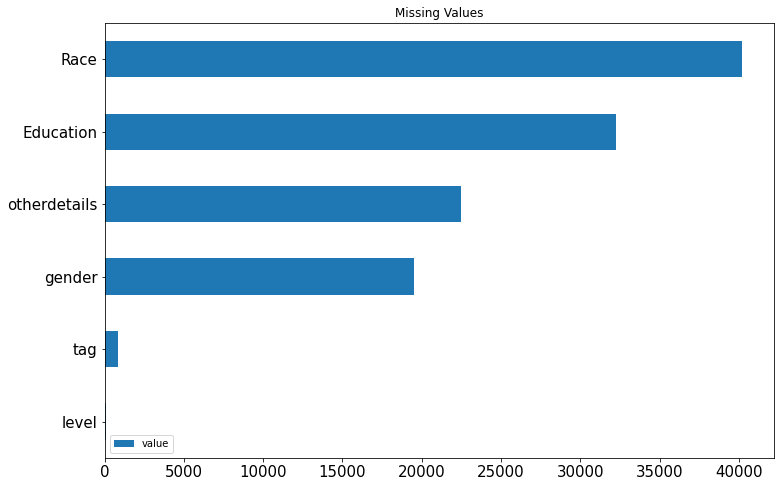

In [2]:
# Find the varibales which has more than 100 missing values, then plot the number of them.
missing_values = pd.DataFrame(df.isnull().sum().sort_values(), columns=["value"]).copy() 
missing_values = missing_values[missing_values.value > 100]
missing_values.plot.barh(figsize=(12, 8), title="Missing Values", fontsize=15)

In [3]:
# Get the variables with missing values
missing_values_df = df[missing_values.index]
# See the statistics in details
profile = ProfileReport(missing_values_df, title="Pandas Profiling Report") ; profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

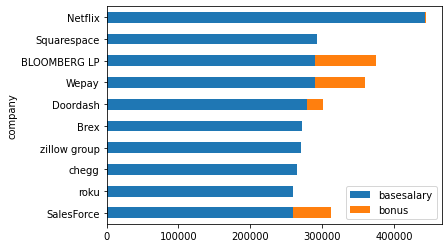

In [4]:
# Select basesalary and bonus with respect to each company, plot in the descending order
df.groupby("company").mean()[["basesalary", "bonus"]].sort_values(ascending=False, by="basesalary")[:10].plot.barh( stacked=True).invert_yaxis()

In [5]:
################## NO NEED TO REMEMBER #################################
import random

# Cost function
def NeuralNetwork(w,x,b):
    return w*x + b

w = random.random()
b = random.random()
lr = 0.000001 # Hyperparameter

x = 353
y = 2

def update_params():
    global w, b
    y_pred = NeuralNetwork(w,x,b)
    derivative_wrt_w = -2*x*(y - y_pred) # partial derivative
    derivative_wrt_b = -2*(y - y_pred) # partial derivative
    w = w - lr*derivative_wrt_w # Update w
    b = b - lr*derivative_wrt_b # Update b

history = []
for epoch in range(100):
    update_params()
    y_hat = NeuralNetwork(w,x,b)
    cost = abs(y - y_hat)
    history.append(cost)
    print(epoch+1, cost)

epsilon = 0.0000000000000001 # Threshold 
y_hat = NeuralNetwork(w,x,b) # prediction of y
(y - y_hat) < epsilon # Check if the prediction is correct
##########################################################################

1 80.86888893747275
2 60.71474443647579
3 45.5834158280173
4 34.22311693535883
5 25.694031732728703
6 19.290565144298053
7 14.482970499036092
8 10.873524591266317
9 8.163624792630927
10 6.129086221811447
11 4.601595353611598
12 3.4547857595845164
13 2.5937840525808626
14 1.9473611909966597
15 1.4620398349764723
16 1.097670267303636
17 0.8241088832862236
18 0.6187244673936316
19 0.4645259556297905
20 0.3487567969677339
21 0.2618396280274351
22 0.19658395593043787
23 0.14759130243345409
24 0.11080859804098875
25 0.08319287923721363
26 0.06245954987371505
27 0.04689338085418804
28 0.03520661247770729
29 0.02643242051601291
30 0.019844932675012306
31 0.014899178553745784
32 0.011186005274581134
33 0.008398229040050165
34 0.0063052223986890255
35 0.0047338348724874635
36 0.003554068545565947
37 0.0026683235826396867
38 0.0020033239793746382
39 0.0015040555772349862
40 0.0011292148462764828
41 0.0008477919222875663
42 0.0006365052194148291
43 0.0004778753886323095
44 0.0003587792842774107
45

True

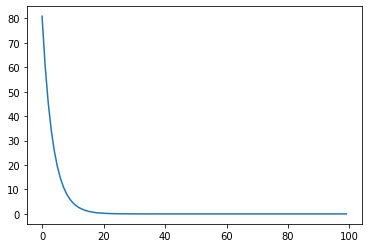

In [6]:
import pandas as pd
pd.Series(history).plot()

In [7]:
# Clean data
df_cleaned= df[df.columns.difference(missing_values.index)].dropna()            # Select variables without missing values(>100), drop missing values(=<100)
df_cleaned = df_cleaned[df_cleaned.basesalary>0]                                # Select rows whose basesalary is larger than 0 
df_cleaned = df_cleaned[(df_cleaned.bonus>0) & (df_cleaned.stockgrantvalue>0)]  # Select rows whose bonus and stockgrantvalue is larger than 0

# y = output, X = input. We would like to predict basesalary with other information we obtain in the dataset
y, X = df_cleaned.pop("basesalary"), \
       df_cleaned[["totalyearlycompensation","yearsofexperience", "yearsatcompany", "stockgrantvalue",  "bonus", "cityid", "company", "title"]]

# Encoding categorical variables(necessary procedure as these are required to be numerical representation = string values are not acceptable in Neural Network)
from sklearn.preprocessing import LabelEncoder
X.company = LabelEncoder().fit_transform(X.company)
X.title = LabelEncoder().fit_transform(X.title)

In [8]:
from sklearn.metrics import mean_squared_error

W = np.random.uniform(low=-0.08, high=0.08, size=(8, 1)).astype('float32')
b = np.zeros(shape=(1,)).astype('float32')

mean = X.mean()
std = X.std()

X = (X - mean)/std

def train(x, y, eps=0.3):
    global W, b
    
    batch_size = x.shape[0]
    
    # Prediction
    y_hat =np.matmul(x, W) + b # shape: (batch_size, output dimension)
    y_hat = np.squeeze(y_hat)

    # Evaluate the cost function
    cost = (y - y_hat).sum().mean()
    delta = (y_hat - y) # shape: (batch_size, output dimension)
    
    # Update parameters
    dW = np.matmul(x.T, delta) / batch_size # shape: (input dimension, output dimension)
    db = np.matmul(np.ones(shape=(batch_size,)), delta) / batch_size # shape: (output dimension,)

    W -= eps * dW[:, np.newaxis]
    b -= eps * db

    return cost

history=  []
for epoch in range(100):
    cost = train(X.values, y.values)
    history.append(cost)
    print(epoch + 1, cost)

1 5479116928.999999
2 3835381821.5625
3 2684767303.625
4 1879337026.53125
5 1315535918.4687502
6 920875200.0937501
7 644612754.5000001
8 451228784.8750001
9 315860349.7500001
10 221102330.62500006
11 154771373.62500006
12 108340161.87500006
13 75837855.50000006
14 53086699.187500075
15 37160832.500000075
16 26012324.93750008
17 18208885.06250009
18 12746019.000000075
19 8922184.56250009
20 6245443.187500078
21 4371609.687500086
22 3060155.3125000913
23 2142137.2500000913
24 1499581.8750001024
25 1049449.500000095
26 734471.3750000745
27 513986.6875001043
28 359933.75000010245
29 251695.81250008196
30 176101.06250008196
31 123413.81250010617
32 86189.1250000894
33 60418.18750008568
34 42092.18750010617
35 29493.062500100583
36 20902.750000100583
37 14603.187500096858
38 10021.687500094995
39 7158.250000100583
40 4867.500000104308
41 3149.437500100583
42 2004.0625001024455
43 1431.3750001080334
44 858.6875001061708
45 858.6875000968575
46 858.6875001080334
47 858.6875001005828
48 858.687

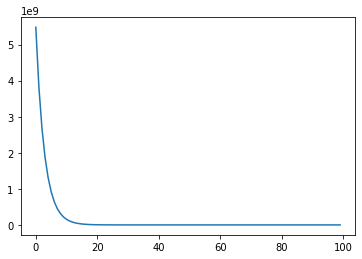

In [9]:
import pandas as pd
pd.Series(history).plot()

In [10]:
########################## ALL YOU NEED ###################################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential([
  layers.Normalization(axis=-1),
  layers.Dense(units=1)])

model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1, decay=1e-2, momentum=0.9, nesterov=True,clipnorm=100),
    loss='mean_absolute_error')
history = model.fit(X, y, epochs=20)
##########################################################################

Epoch 1/20
1146/1146 [==============================] - 2s 1ms/step - loss: 149317.6250
Epoch 2/20
1146/1146 [==============================] - 1s 1ms/step - loss: 149201.8281
Epoch 3/20
1146/1146 [==============================] - 1s 1ms/step - loss: 149151.7031
Epoch 4/20
1146/1146 [==============================] - 1s 1ms/step - loss: 149118.7500
Epoch 5/20
1146/1146 [==============================] - 1s 1ms/step - loss: 149093.7969
Epoch 6/20
1146/1146 [==============================] - 1s 1ms/step - loss: 149073.9844
Epoch 7/20
1146/1146 [==============================] - 1s 1ms/step - loss: 149057.5625
Epoch 8/20
1146/1146 [==============================] - 1s 1ms/step - loss: 149043.4531
Epoch 9/20
1146/1146 [==============================] - 1s 1ms/step - loss: 149031.0938
Epoch 10/20
1146/1146 [==============================] - 1s 1ms/step - loss: 149019.8906
Epoch 11/20
1146/1146 [==============================] - 1s 1ms/step - loss: 149009.9062
Epoch 12/20
1146/1146 [=======

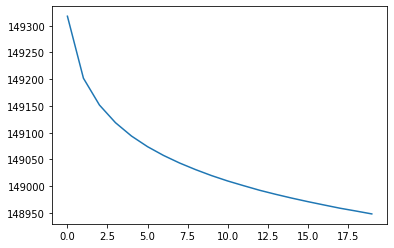

In [11]:
import pandas as pd
pd.Series(history.history["loss"]).plot()

In [12]:
########################## ALL YOU NEED ###################################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential([
  layers.Normalization(axis=-1),
  layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
  layers.Dense(units=1)])

model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1, decay=1e-2, momentum=0.9, nesterov=True,clipnorm=1),
    loss='mean_absolute_error')
history = model.fit(X, y, epochs=20)
##########################################################################

Epoch 1/20
1146/1146 [==============================] - 3s 2ms/step - loss: 9070.0947
Epoch 2/20
1146/1146 [==============================] - 2s 2ms/step - loss: 2471.5562
Epoch 3/20
1146/1146 [==============================] - 2s 2ms/step - loss: 2393.8181
Epoch 4/20
1146/1146 [==============================] - 2s 2ms/step - loss: 2363.2373
Epoch 5/20
1146/1146 [==============================] - 2s 2ms/step - loss: 2342.2185
Epoch 6/20
1146/1146 [==============================] - 2s 2ms/step - loss: 2332.3022
Epoch 7/20
1146/1146 [==============================] - 2s 2ms/step - loss: 2324.4968
Epoch 8/20
1146/1146 [==============================] - 2s 2ms/step - loss: 2318.2920
Epoch 9/20
1146/1146 [==============================] - 2s 2ms/step - loss: 2313.7620
Epoch 10/20
1146/1146 [==============================] - 2s 2ms/step - loss: 2309.2734
Epoch 11/20
1146/1146 [==============================] - 2s 2ms/step - loss: 2306.4224
Epoch 12/20
1146/1146 [=============================

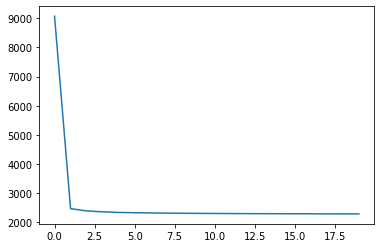

In [13]:
import pandas as pd
pd.Series(history.history["loss"]).plot()

## Reference

- Kaggle: Data Science and STEM Salaries(https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries)
- Essential Math for Data Science(https://www.amazon.co.jp/-/en/Hadrien-Jean/dp/1098115562)
- Mathematics for Machine Learning https://www.google.com/search?q=math+for+machine+learning&rlz=1C1QABZ_jaJP941JP942&oq=math+for+machine+learning&aqs=chrome..69i57j46i512j0i512l5j69i60.3376j0j1&sourceid=chrome&ie=UTF-8
- Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython 2nd Edition(https://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1491957662)
- 3Blue1Brown The essence of calculus https://www.youtube.com/watch?v=WUvTyaaNkzM&t=280s
- https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc
- Introduction to Machine Learning Interviews Book
 https://huyenchip.com/ml-interviews-book/